## Project Brief: Green Destinations

Green Destinations is a well-known travel agency. The HR Director has recently noticed and increase in employess leaving (attrition)

She would like to figure out any trends or patterns. She has surveyed the staff of Green Destinations and provided you with the data. She would like to know what the attrition rate is (% of people who left). She would also like to know if factors like age, years at the company and income play a part in determining if people will leave or not.


# 1. Process

In [3]:
#Importing Neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing Data
data = pd.read_csv("greendestination.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#Removing Unnecessary Columns
data = data.drop(columns=['EmployeeCount','Over18','StandardHours'])

In [5]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#Printing Rows & Columns of dataset
print(f'Rows: {data.shape[0]}\nColumns: {data.shape[1]}')

Rows: 1470
Columns: 32


In [7]:
#Checking whether any null values are present
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# 2. Analyse

In [8]:
#finding number of employee's
print(f"No. of employee's: {len(data)}")

No. of employee's: 1470


In [9]:
#finding number of attrition's
attrition_count = 0
for i in range(len(data['Attrition'])):
    if data['Attrition'][i] == 'Yes':
        attrition_count += 1

print(f"No. of attrition: {attrition_count}")

No. of attrition: 237


In [10]:
#finding attrition rate
print(f"Attrition rate: {round((attrition_count/len(data['Attrition']))*100, 1)} %")

Attrition rate: 16.1 %


In [19]:
#finding average age
average =round(data['Age'].mean())
print('Average Salary:',average)

Average Salary: 37


In [12]:
#finding average salary
average =round(data['MonthlyIncome'].mean())
print('Average Salary:',average)

Average Salary: 6503


In [17]:
#finding average years
average =round(data['YearsAtCompany'].mean(), 1)
print('Average Salary:',average)

Average Salary: 7.0


In [27]:
#segregating employees by gender
gender_count = data['Gender'].value_counts()
print(f"Male: {gender_count.iloc[0]}")
print(f"Female: {gender_count.iloc[1]}")

Male: 882
Female: 588


In [29]:
#finding attrition by gender
male_attrition_count = 0
female_attrition_count = 0

for i in range(len(data)):
    if data['Attrition'][i] == 'Yes':
        if data['Gender'][i] == 'Male':
            male_attrition_count += 1
        elif data['Gender'][i] == 'Female':
            female_attrition_count += 1

print("Attrition by Gender:")
print(f"Male: {male_attrition_count}")
print(f"Female: {female_attrition_count}")

Attrition by Gender:
Male: 150
Female: 87


In [32]:
# Get unique job roles from the dataset
unique_job_roles = data['JobRole'].unique()
print(f"No. of job roles: {len(unique_job_roles)}")
print()

# Initialize a dictionary to count attrition for each job role
attrition_counts = {
    'Sales Executive': 0,
    'Research Scientist': 0,
    'Laboratory Technician': 0,
    'Manufacturing Director': 0,
    'Healthcare Representative': 0,
    'Manager': 0,
    'Sales Representative': 0,
    'Research Director': 0,
    'Human Resources': 0
}

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the employee has left the company (attrition)
    if row['Attrition'] == 'Yes':
        # Increment the count for the respective job role
        if row['JobRole'] in attrition_counts:
            attrition_counts[row['JobRole']] += 1

# Print the attrition counts by job role
print("Attrition by Job Role:")
for job_role, count in attrition_counts.items():
    print(f"{job_role}: {count}")

No. of job roles: 9

Attrition by Job Role:
Sales Executive: 57
Research Scientist: 47
Laboratory Technician: 62
Manufacturing Director: 10
Healthcare Representative: 9
Manager: 5
Sales Representative: 33
Research Director: 2
Human Resources: 12


In [34]:
# Initialize a dictionary to count attrition by age group
age_groups = {
    '18-25': 0,
    '26-35': 0,
    '36-45': 0,
    '46-55': 0,
    '56-60': 0
}

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the employee has left the company (attrition)
    if row['Attrition'] == 'Yes':
        # Determine the age group and increment the corresponding count
        if 18 <= row['Age'] <= 25:
            age_groups['18-25'] += 1
        elif 26 <= row['Age'] <= 35:
            age_groups['26-35'] += 1
        elif 36 <= row['Age'] <= 45:
            age_groups['36-45'] += 1
        elif 46 <= row['Age'] <= 55:
            age_groups['46-55'] += 1
        elif 56 <= row['Age'] <= 60:
            age_groups['56-60'] += 1

# Print the attrition counts by age group
print("Attrition by Age Group:")
for age_group, count in age_groups.items():
    print(f"Attrition from {age_group} years: {count}")

Attrition by Age Group:
Attrition from 18-25 years: 44
Attrition from 26-35 years: 116
Attrition from 36-45 years: 43
Attrition from 46-55 years: 26
Attrition from 56-60 years: 8


In [36]:
#finding attrition by salary
count_monthly_income_upto_2k = 0
count_monthly_income_upto_5k = 0
count_monthly_income_upto_10k = 0
count_monthly_income_upto_15k = 0
count_monthly_income_upto_15kplus = 0
for i in range(len(data)):
    if data['Attrition'][i] == 'Yes':
        if data['MonthlyIncome'][i] <= 2000:
            count_monthly_income_upto_2k += 1
        elif data['MonthlyIncome'][i] >= 2001 and data['MonthlyIncome'][i] <= 5000:
            count_monthly_income_upto_5k += 1
        elif data['MonthlyIncome'][i] >= 5001 and data['MonthlyIncome'][i] <= 10000:
            count_monthly_income_upto_10k += 1
        elif data['MonthlyIncome'][i] >= 10001 and data['MonthlyIncome'][i] <= 15000:
            count_monthly_income_upto_15k += 1
        elif data['MonthlyIncome'][i] >= 15001:
            count_monthly_income_upto_15kplus += 1

print(f"Attrition salary band from upto 2k: {count_monthly_income_upto_2k}")
print(f"Attrition salary band from 2k - 5k: {count_monthly_income_upto_5k}")
print(f"Attrition salary band from 5k - 10k: {count_monthly_income_upto_10k}")
print(f"Attrition salary band from 10k - 15k: {count_monthly_income_upto_15k}")
print(f"Attrition salary band from 15k plus: {count_monthly_income_upto_15kplus}")

Attrition salary band from upto 2k: 18
Attrition salary band from 2k - 5k: 145
Attrition salary band from 5k - 10k: 49
Attrition salary band from 10k - 15k: 20
Attrition salary band from 15k plus: 5


In [39]:
# Get unique education fields from the dataset
unique_education_fields = data['EducationField'].unique()
print(f"No. of education fields: {len(unique_education_fields)}")
print()

# Initialize a dictionary to count attrition by education field
education_counts = {
    'Life Sciences': 0,
    'Other': 0,
    'Medical': 0,
    'Marketing': 0,
    'Technical Degree': 0,
    'Human Resources': 0
}

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the employee has left the company (attrition)
    if row['Attrition'] == 'Yes':
        # Increment the count for the respective education field
        if row['EducationField'] in education_counts:
            education_counts[row['EducationField']] += 1

# Print the attrition counts by education field
print("Attrition by Education Field:")
for education_field, count in education_counts.items():
    print(f"{education_field}: {count}")

No. of education fields: 6

Attrition by Education Field:
Life Sciences: 89
Other: 11
Medical: 63
Marketing: 35
Technical Degree: 32
Human Resources: 7


In [41]:
data.to_csv('cleaned-greendestination-dataset.csv', index = False)

: 

# Report


- No. of employee's: 1470
- No. of attrition: 237
- Attrition rate: 16.1 %
- Average age: 37
- Average salary: $ 6503
- Average years: 7.0
- Male: 882, Female: 588
- Attrition by Gender: Male: 150, Female: 87
- No. of job roles: 9
- Attrition by Job Role:
  1. Sales Executive: 57
  2. Research Scientist: 47
  3. Laboratory Technician: 62
  4. Manufacturing Director: 10
  5. Healthcare Representative: 9
  6. Manager: 5
  7. Sales Representative: 33
  8. Research Director: 2
  9. Human Resources: 12
- Attrition by Age:
  1. (18 - 25) yrs: 44
  2. (26 - 35) yrs: 116
  3. (36 - 45) yrs: 43
  4. (46 - 55) yrs: 26
  5. (56 - 60) yrs: 8
- Attrition by Salary:
  1. upto 2k: 18
  2. 2k - 5k: 145
  3. 5k - 10k: 49
  4. 10k - 15k: 20
  5. 15k plus: 5
- No. of education field: 6
- Attrition by Education:
  1. Life Sciences: 89
  2. Others: 11
  3. Medical: 63
  4. Marketing: 35
  5. Technical Degree: 32
  6. Human Resources: 7

## Dashboard
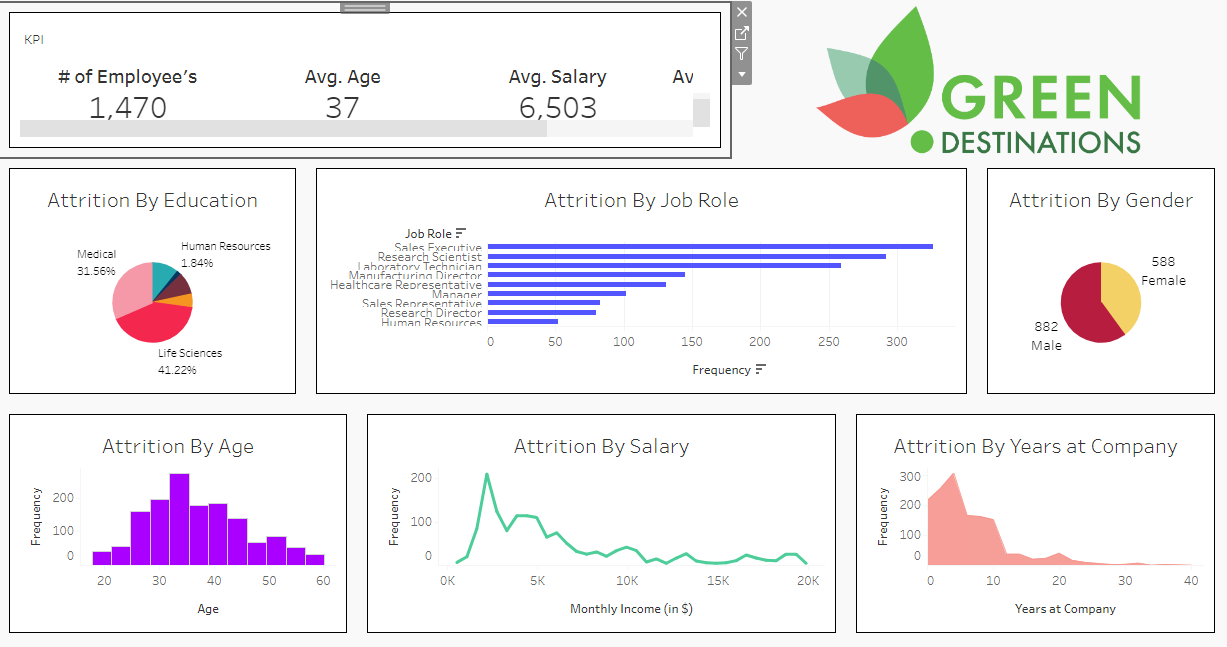